In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

F:\Program Files\anaconda\envs\gg\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
F:\Program Files\anaconda\envs\gg\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
F:\Program Files\anaconda\envs\gg\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
epsilon=1e-10
predict1=np.array([[4,3,3],
                   [3,4,3],
                   [5,2,3],
                   [6,2,2],
                   ])/10

predict2=np.array([[8,1,1],
                   [1,7,2],
                   [7,1,2],
                   [4,3,3],
                   ])/10
ans=np.array([[1,0,0],
                   [0,1,0],
                   [1,0,0],
                   [0,1,1],
                   ])
def mse(ans,pred):
    return((ans-pred)**2).mean().sum()/ans.shape[0]
def mae(ans,pred):
    return(np.abs(ans-pred)).mean().sum()/ans.shape[0]
def ce(ans,pred):
    return-((ans*np.log10(pred+epsilon))).sum()/ans.shape[0]
def focal_loss(ans,pred):
    gamma=2.
    alpha=1
    return -(alpha *ans*((1-pred)**gamma)*np.log10(pred+epsilon)).sum()/ans.shape[0]
print("mae:",mae(ans,predict1))
print("mse:",mse(ans,predict1))
print("cross-entropy:",ce(ans,predict1))
print("focal_loss:",focal_loss(ans,predict1))

mae: 0.11666666666666665
mse: 0.06458333333333334
cross-entropy: 0.6237125052354483
focal_loss: 0.3141139775830326


In [3]:
print("mae:",mae(ans,predict2))
print("mse:",mse(ans,predict2))
print("cross-entropy:",ce(ans,predict2))
print("focal_loss:",focal_loss(ans,predict2))

mae: 0.07083333333333335
mse: 0.030833333333333334
cross-entropy: 0.3631178557680793
focal_loss: 0.13604498088431954


Text(0.5, 1.0, 'focal_loss')

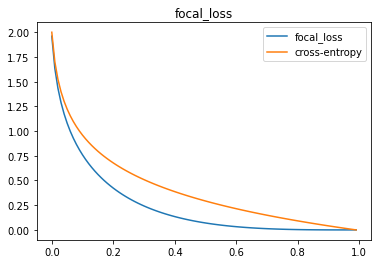

In [4]:
focallog=[]
celog=[]
for i in range(100):
    focallog.append(focal_loss(np.array([[1,0]]),np.array([[i/100+0.01,1-i/100]])))
    celog.append(ce(np.array([[1,0]]),np.array([[i/100+0.01,1-i/100]])))
    
plt.plot(np.arange(100)/100,focallog,label='focal_loss')
plt.plot(np.arange(100)/100,celog,label='cross-entropy')
plt.legend()
plt.title("focal_loss")